# Airline Passenger Satisfaction
- [Content](#Content)
- [1-Reading & Analysing Data](#1-Reading-&-Analysing-Data)
 - [1.1- Null value control](#1.1--Null-value-control)
 - [1.2- Describing Parameters](#1.2--Describing-Parameters)
- [2-Visualization Data](#2-Visualization-Data)
 - [2.1-Categorical Data](#2.1-Categorical-Data)
   - [Bar Chart](#Bar-Chart)
 - [2.2-Numerical Data](#2.2-Numerical-Data)
   - [Histogram](#Histogram)
   - [Density Function](#Density-Function)
   - [Box Plot](#Box-Plot)
- [3-Preprocessing Data](#3-Preprocessing-Data)
 - [3.1-Dummies Variable](#3.1-Dummies-Variable)
 - [3.2-X_train-y_train, X_test-y_test](#3.2-X_train-y_train,-X_test-y_test)
- [4-Data Modeling](#4-Data-Modeling)
 - [4.1-Logistic Regression](#4.1-Logistic-Regression)
 - [4.2-k-Nearest Neighbors](#4.2-k-Nearest-Neighbors)
 - [4.3-Decision Tree Classifier](#4.3-Decision-Tree-Classifier)
 - [4.4-Ridge Regresion](#4.4-Ridge-Regresion)
 - [4.5-Lasso Regression](#4.5-Lasso-Regression)
 - [4-6-Model Comparison](#4-6-Model-Comparison)

## Task
- 1) What factors are highly correlated to a satisfied (or dissatisfied) passenger? [ANS-1](#ANS-1)
- 2) Can you predict passenger satisfaction? [ANS-2](#ANS-2)

## Content
This dataset contains an airline passenger satisfaction survey. 
- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

[Data from kaggle.com](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)




In [1]:
#import modelus
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1-Reading & Analysing Data

In [2]:
#file_extention
pwd = os.getcwd()

'pandas' modelus was used to read test and training data.

In [3]:
#reading train and test data
air_train = pd.read_csv(pwd + "\\train.csv")
air_test = pd.read_csv(pwd + "\\test.csv")

In [4]:
air_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
air_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

#### 1.1- Null value control

In [7]:
air_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

We checked for null values in our train dataset. We realized that 'Arrival Delay in Minutes' has '310' null values. The effect of rows having 310 null values in our data collection with a total length of 103904 would be very low, so rows containing this value were eliminated.

In [8]:
air_train.dropna(inplace=True)

In [9]:
air_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


We checked for null values in our test dataset. We realized that 'Arrival Delay in Minutes' has '83' null values. The situation is similar to that in the training dataset., so rows containing this value were eliminated.

In [10]:
air_train.dropna(inplace=True)

#### 1.2- Describing Parameters

In [11]:
air_train.iloc[:,2:].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [12]:
air_test.iloc[:,2:].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In comparison to other factors, the 'Age' and 'Flight Distance' variables have fairly huge ranges. When building the model, this will be taken into account.

## 2-Visualization Data

#### 2.1-Categorical Data

Bar graphs were used to assess categorical data. Categorical data were used for variables other than 'Age' and 'Flight Distance.'

The unique values of the 'object' data type variables are examined.

In [13]:
def unique_val(data):
    for i in data.columns:
        if type(data[i][0]) == str:
            print(i,"\n", data[i].unique(),"\n", sep="")

In [14]:
unique_val(air_train)

Gender
['Male' 'Female']

Customer Type
['Loyal Customer' 'disloyal Customer']

Type of Travel
['Personal Travel' 'Business travel']

Class
['Eco Plus' 'Business' 'Eco']

satisfaction
['neutral or dissatisfied' 'satisfied']



In [15]:
unique_val(air_test)

Gender
['Female' 'Male']

Customer Type
['Loyal Customer' 'disloyal Customer']

Type of Travel
['Business travel' 'Personal Travel']

Class
['Eco' 'Business' 'Eco Plus']

satisfaction
['satisfied' 'neutral or dissatisfied']



#### Bar Chart
A bar chart uses bars to show comparisons between categories of data. 
- A bar graph will always have two axis. One axis will generally have numerical values, and the other will describe the types of categories being compared.
- We would need to decide whether the data you are trying to represent has an intuitive direction or not.


In [16]:
def bar_chart(df, percent=None):
    for i in range(0,len(df.columns)-1,3):
        sns.set()
        column=df.columns[i]
        plt.figure(figsize=(17.5, 5)) 
        plt.subplot(1, 3, 1)     
        plt1 = df[column].value_counts().plot(kind='bar')
        plt.title(f"{column} Bar Chart")
        plt1.set(xlabel = f"{column}", ylabel=f'Frequency of {column}')
        if percent == None:
            for p in plt1.patches:
                width = p.get_width()
                height = p.get_height()
                x, y = p.get_xy() 
                plt1.annotate((f"{round((height / len(df[column]))*100, 2)}")+" %", (x + width/2, y + height*1.02), ha='center')

        column=df.columns[i+1]       
        plt.subplot(1, 3, 2) 
        plt1 = df[column].value_counts().plot(kind='bar')
        plt.title(f"{column} Bar Chart")
        plt1.set(xlabel = f"{column}", ylabel=f'Frequency of {column}')
        if percent == None:
            for p in plt1.patches:
                width = p.get_width()
                height = p.get_height()
                x, y = p.get_xy() 
                plt1.annotate((f"{round((height / len(df[column]))*100, 2)}")+" %", (x + width/2, y + height*1.02), ha='center')

        column=df.columns[i+2]
        plt.subplot(1, 3, 3)      
        plt1 = df[column].value_counts().plot(kind='bar')
        plt.title(f"{column} Bar Chart")
        plt1.set(xlabel = f"{column}", ylabel=f'Frequency of {column}')

        if percent == None:
            for p in plt1.patches:
                width = p.get_width()
                height = p.get_height()
                x, y = p.get_xy() 
                plt1.annotate((f"{round((height / len(df[column]))*100, 2)}")+" %", (x + width/2, y + height*1.02), ha='center')

In [17]:
categorical = air_train[['Gender', 'Customer Type', 'Type of Travel','Class', 'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']]

- Other than 'gender,' our variables are qualified to be employed in our model. Below, we'll look at the'satisfied' and 'dissatisfied' status of 'Gender.'

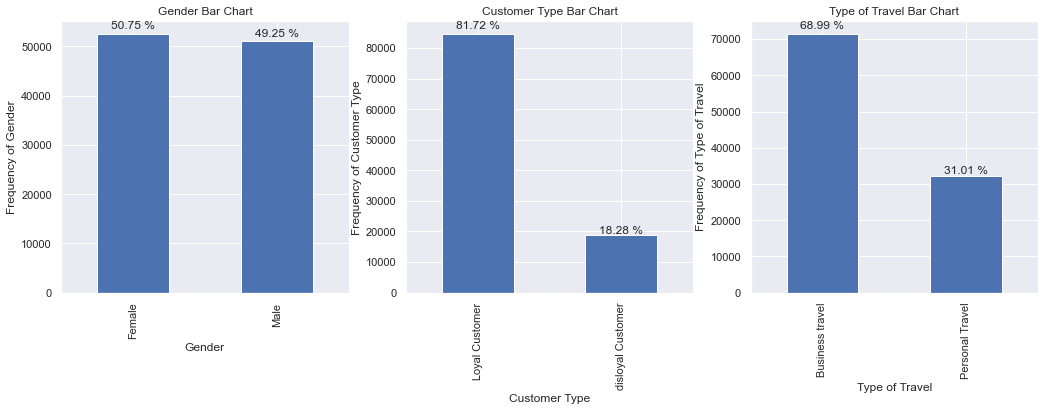

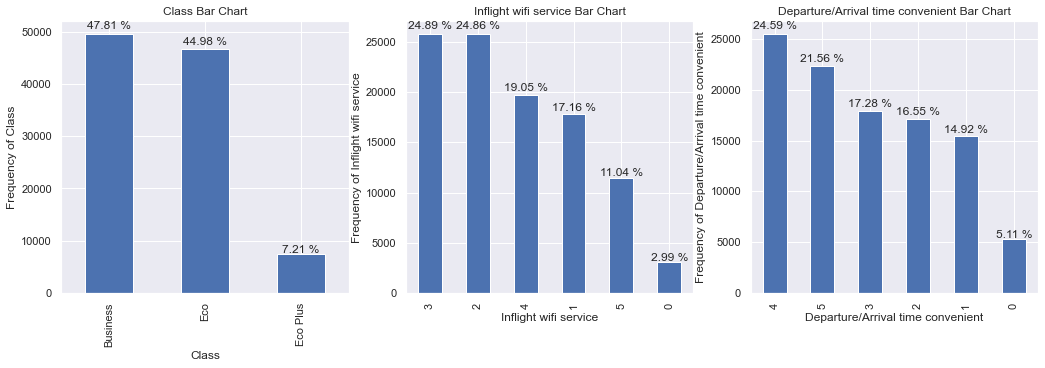

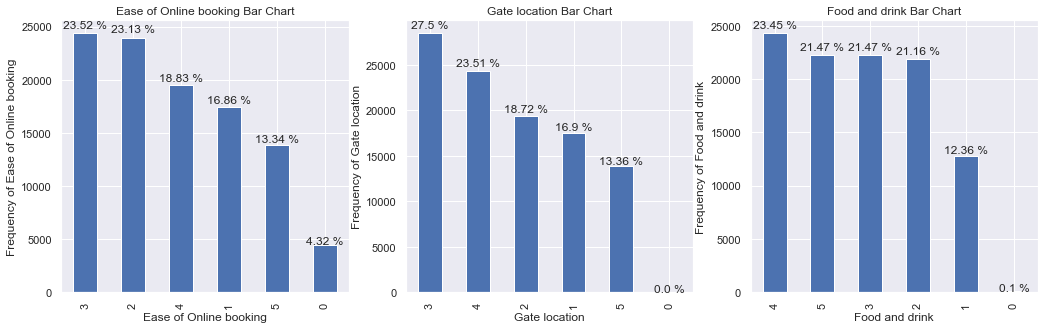

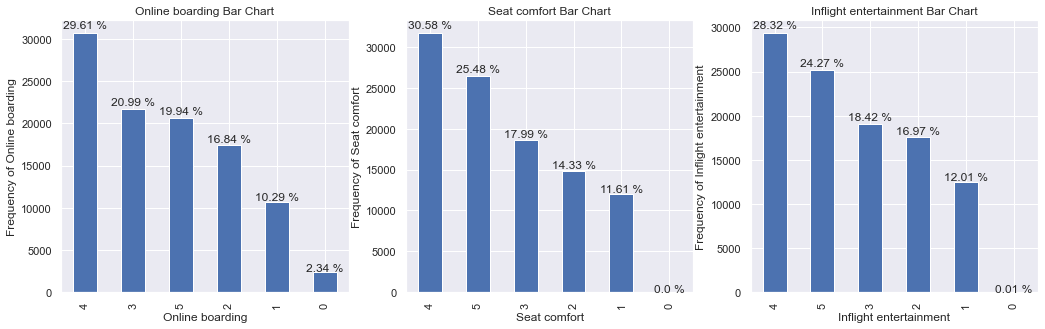

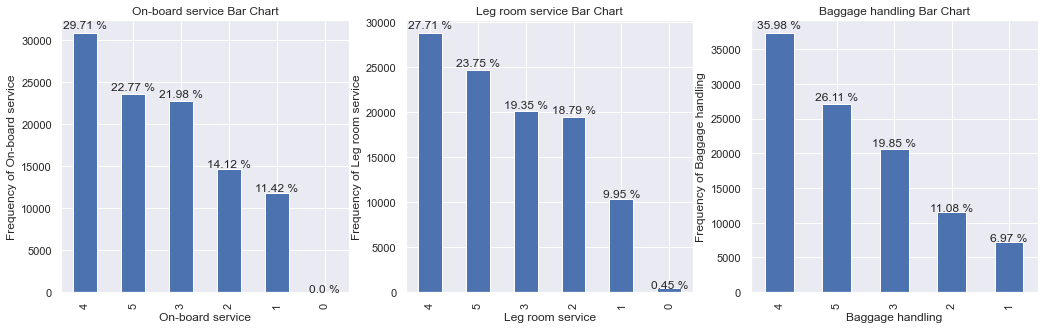

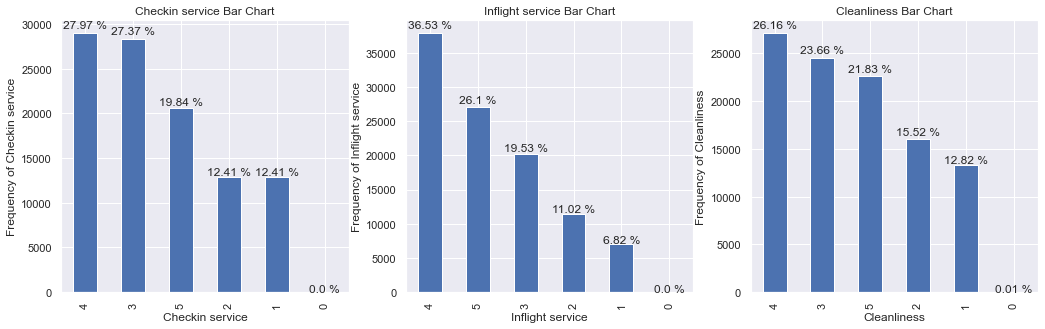

In [18]:
bar_chart(categorical)

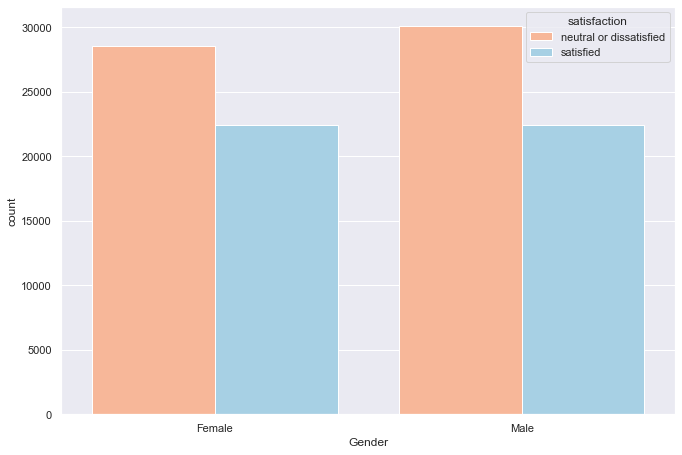

In [19]:
plt.figure(figsize=(11,7.5))
sns.countplot(x='Gender', hue='satisfaction', data=air_train, palette='RdBu',saturation=1)
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

- The results for 'Gender' is likewise very similar. We may conclude that 'Gender' will not assist the model in making decisions.

#### 2.2-Numerical Data
Numerical data were analyzed with Histogram, Density Function and Boxplot.

#### Histogram
A Histogram is a chart plotting a variable, like time, against the number of occurrences in the variable category. Histograms are good for showing general distributional features of dataset variables.

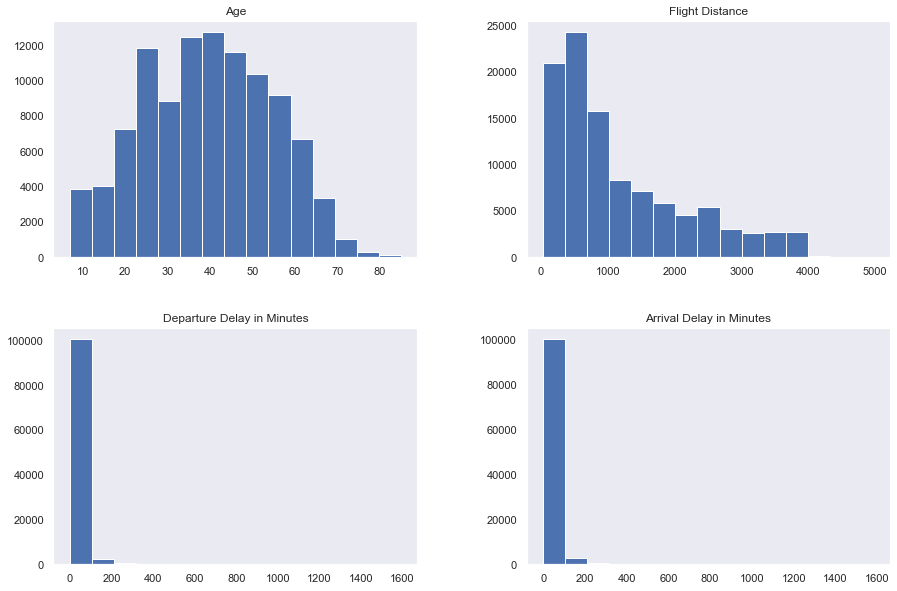

In [20]:
air_train[["Age", "Flight Distance", 'Departure Delay in Minutes','Arrival Delay in Minutes']].hist(bins=15, figsize=(15,10), grid=False,)
plt.show()

#### Density Function

Probability density function (PDF) is a statistical expression that defines a probability distribution (the likelihood of an outcome) for a discrete random variable (e.g., a stock or ETF) as opposed to a continuous random variable.

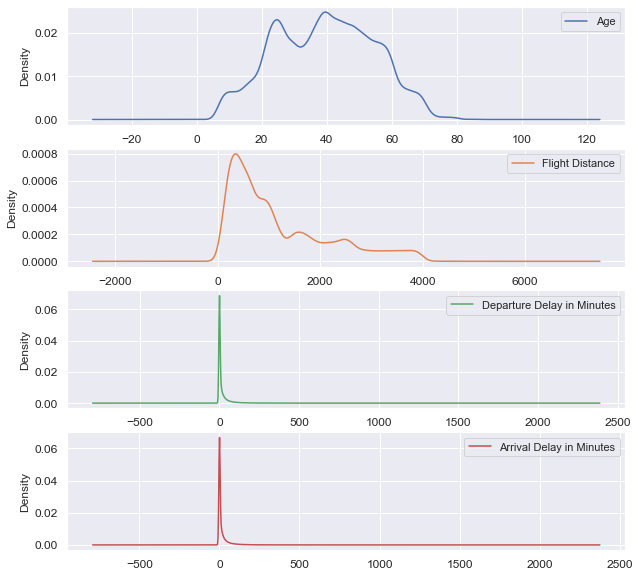

In [21]:
air_train[["Age", "Flight Distance", 'Departure Delay in Minutes','Arrival Delay in Minutes']].plot(kind= 'density', 
                                                                                                    subplots=True, 
                                                                                                    sharex=False, 
                                                                                                    sharey=False, 
                                                                                                    fontsize=12,
                                                                                                    figsize=(10,10))
plt.show()

##### Box Plot

A box plot is a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum.

In [21]:
def box_plot(column):
    Q1, Q2, Q3 = np.quantile(air_train[[column]], [0.25, 0.50, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    air_train[[column]].plot(kind= 'box')
    plt.text(1.25, 50,f"UB:  {upper_bound}\nQ3:  {Q3}\nQ2:  {Q2}\nQ1:  {Q1}\nLB:  {lower_bound}")
    plt.show()

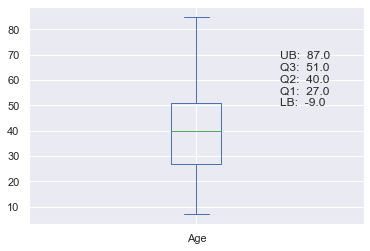

In [22]:
box_plot("Age")

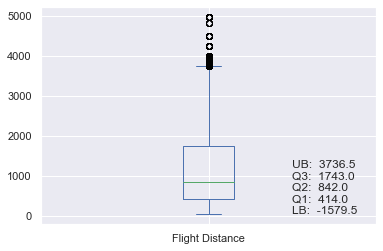

In [23]:
box_plot("Flight Distance")

We looked at numerical variables. The distribution of 'Age' appears to be comparable to that of the normal distribution, whereas the distribution of 'Flight Distance' appears to be exponential. The variables 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' are extremely close together. These two variables will not be included in the model because their impact on it will be minimal.

In [24]:
air_train.drop(columns=["Unnamed: 0", "id", "Gender", 'Departure Delay in Minutes','Arrival Delay in Minutes'], inplace=True)
air_test.drop(columns=["Unnamed: 0", "id","Gender", 'Departure Delay in Minutes','Arrival Delay in Minutes'], inplace=True)

## 3-Preprocessing Data

#### 3.1-Dummies Variable

Scikit-learn does not accept non-numerical features. A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value.

In [25]:
air_train_dummy = pd.get_dummies(air_train, drop_first=True)
air_test_dummy = pd.get_dummies(air_test, drop_first=True)

In [26]:
air_train_dummy.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,3,4,4,5,5,0,1,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,5,3,1,4,1,1,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,3,4,4,4,5,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,5,3,1,4,2,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,4,4,3,3,3,0,0,0,0,1


In [27]:
air_test_dummy.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,52,160,5,4,3,4,3,4,3,5,...,5,5,2,5,5,0,0,1,0,1
1,36,2863,1,1,3,1,5,4,5,4,...,4,4,3,4,5,0,0,0,0,1
2,20,192,2,0,2,4,2,2,2,2,...,1,3,2,2,2,1,0,1,0,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,1,3,1,4,0,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,2,2,4,2,4,0,0,1,0,1


#### 3.2-X_train-y_train, X_test-y_test

Data is divided into train and test dataset.

In [28]:
X_train = air_train_dummy.iloc[: , :-1]
y_train = air_train_dummy["satisfaction_satisfied"]
X_test = air_test_dummy.iloc[: , :-1]
y_test = air_test_dummy["satisfaction_satisfied"]

In [29]:
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## 4-Data Modeling

In [30]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# 4.1-Logistic Regression

Hedef değişken için iki olası etiketimiz olduğunda, ikili sınıflandırma için lojistik regresyon veya log reg çalışmalarını kullanacağız.

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. **C controls** the inverse of the regularization strength. A large **C** can lead to an overfit model, while a small can lead to an underfit model. C:"Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization."


- **Scaling Data** \
"Age" and "Distance" on a different scale than others. If there are features on far larger scales, they can unduly influence our model.Given any column, you can subtract the mean and divide by the variance so that all features are centred around zero and have variance one. This is called standardization. We'll use standardization.

- **Pipeline** \
There are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. The entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process.

- **GridSearchCV** \
We also knew that we had to choose a value for the alpha in ridge and lasso regression before fitting it. Analogously, before fitting and predicting K-nearest neighbors, we need to choose n neighbors. Such parameters, ones that need to be specified before fitting a model, are called hyperparameters. In other words, these are parameters that cannot be explicitly learned by fitting the model. Here in lies a fundamental key for building a successful model: choosing the correct hyperparameter. \
We then perform k-fold cross-validation for each point in the grid, that is, for each choice of hyperparameter or combination of hyperparameters. We then choose for our model the choice of hyperparameters that performed the best. This is called a grid search and in scikit-learn we implement it using the class GridSearchCV.

- **5-fold cross-validation** \
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model. The model is not only trained, but also tested on all of the available data. \
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this project, we will use cv=5 to perform 5-fold cross-validation.

Tuned Logistic Regression Parameters: {'logreg__C': 0.4393970560760795}
Best score is 0.8745584028105992


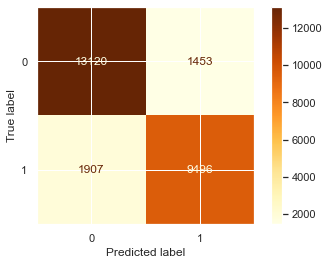

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [54]:
# Setup the pipeline
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression(max_iter=500))]

pipeline = Pipeline(steps)

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'logreg__C': c_space}

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(pipeline, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

# Predict the labels of the test set: y_pred
y_pred = logreg_cv.predict(X_test)

# Compute and print  the confusion matrix and classification report
plot_confusion_matrix(logreg_cv, X_test, y_test, cmap='YlOrBr')  
plt.show()

print(classification_report(y_test, y_pred))

#### 4.2-k-Nearest Neighbors

The KNN (K-Nearest Neighbors) Algorithm predicts two fundamental values:
- The distance between the point being estimated and other points is calculated. The Minkowski distance computation function is used for this.
- K (neighbors): We specify the number of closest neighbors to calculate. The K value has a direct impact on the outcome.

Accuracy without Scaling: 0.8082460732984293
Accuracy with Scaling   : 0.9307052663997536


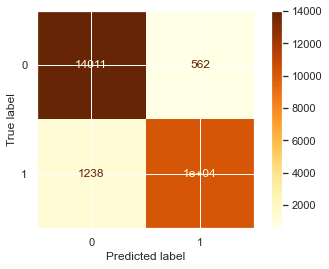

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14573
           1       0.95      0.89      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [55]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=3))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

y_pred = knn_scaled.predict(X_test)

# Compute and print metrics
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))
print('Accuracy with Scaling   : {}'.format(knn_scaled.score(X_test, y_test)))

# Compute and print  the confusion matrix and classification report
plot_confusion_matrix(knn_scaled, X_test, y_test, cmap='YlOrBr')  
plt.show()

print(classification_report(y_test, y_pred))

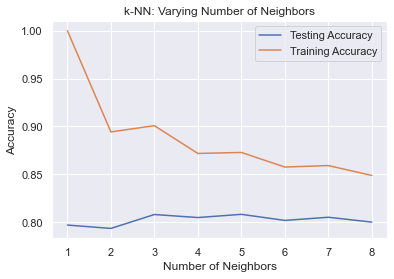

In [56]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


En uygun "komşu sayısı", iki satır benzerlik göstermeden önceki "komşu sayısıdır". Here, 3 will give us the best results.

#### 4.3-Decision Tree Classifier
A decision tree is a structure that uses a collection of decision rules to divide a dataset with a large number of records into smaller groupings. To put it another way, it's a structure for breaking enormous volumes of data into small groups of data using simple decision-making stages.
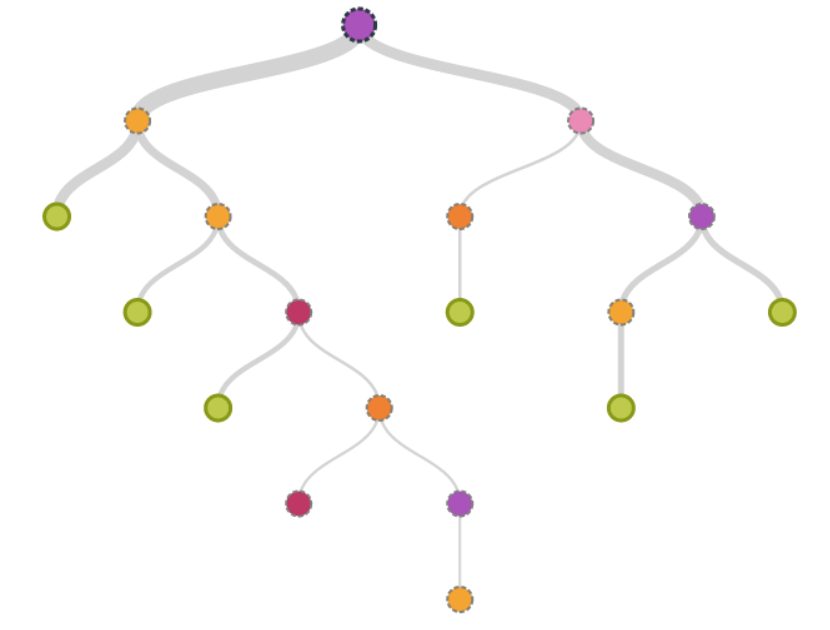

Tuned Logistic Regression Parameters: {'decision__random_state': 0}
Best score is 0.9441956117204231


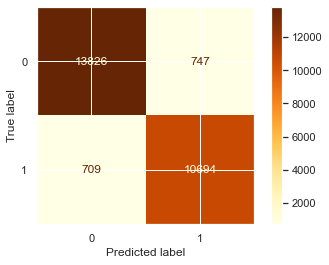

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14573
           1       0.93      0.94      0.94     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [57]:
from sklearn.tree import DecisionTreeClassifier

# Setup the pipeline
steps = [("scaler", StandardScaler()),
         ("decision", DecisionTreeClassifier())]

pipeline = Pipeline(steps)

# Setup the hyperparameter grid
random_state = [0, 42]
param_grid = {'decision__random_state': random_state}

# Instantiate the GridSearchCV object: logreg_cv
decision_cv = GridSearchCV(pipeline, param_grid, cv=5)

# Fit it to the data
decision_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(decision_cv.best_params_)) 
print("Best score is {}".format(decision_cv.best_score_))

# Compute and print  the confusion matrix and classification report
plot_confusion_matrix(decision_cv, X_test, y_test, cmap='YlOrBr')  
plt.show()

y_pred = decision_cv.predict(X_test)
print(classification_report(y_test, y_pred))

#### 4.4-Ridge Regresion
It is common practice to alter the loss function so that it penalizes for large coefficients. This is called regularization. The first type of regularized regression ridge regression in which our loss function is the standard OLS loss function plus the squared value of each coefficient multiplied by some constant alpha.
Thus, when minimizing the loss function to fit to our data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients, that is. 
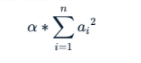
- "Alpha" is a parameter we need to choose in order to fit and predict. Essentially, we can select the alpha for which our model performs best.

- A very high alpha means that large coefficients are significantly penalized, which can lead to a model that is too simple and ends up underfitting the data. Also notice the argument normalize: setting this equal to True ensures that all our variables are on the same scale and we will cover this in more depth later.

- The ridge regression will penalize your coefficients, **such that those that are the least effective in your estimation will "shrink" the fastest.**



In [34]:
steps = [("scaler", StandardScaler()),
         ("ridge", Ridge(normalize=True))]

pipeline = Pipeline(steps)

# Setup the hyperparameter grid
alpha_space = np.logspace(-6, 2, 20)
param_grid = {'ridge__alpha': alpha_space}

# Instantiate the GridSearchCV object: logreg_cv
ridge_cv = GridSearchCV(pipeline, param_grid, cv=5)

# Fit it to the data
ridge_cv.fit(X_train, y_train)

print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_)) 
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Ridge Regression Parameters: {'ridge__alpha': 0.0003359818286283781}
Best score is 0.5503875753654959


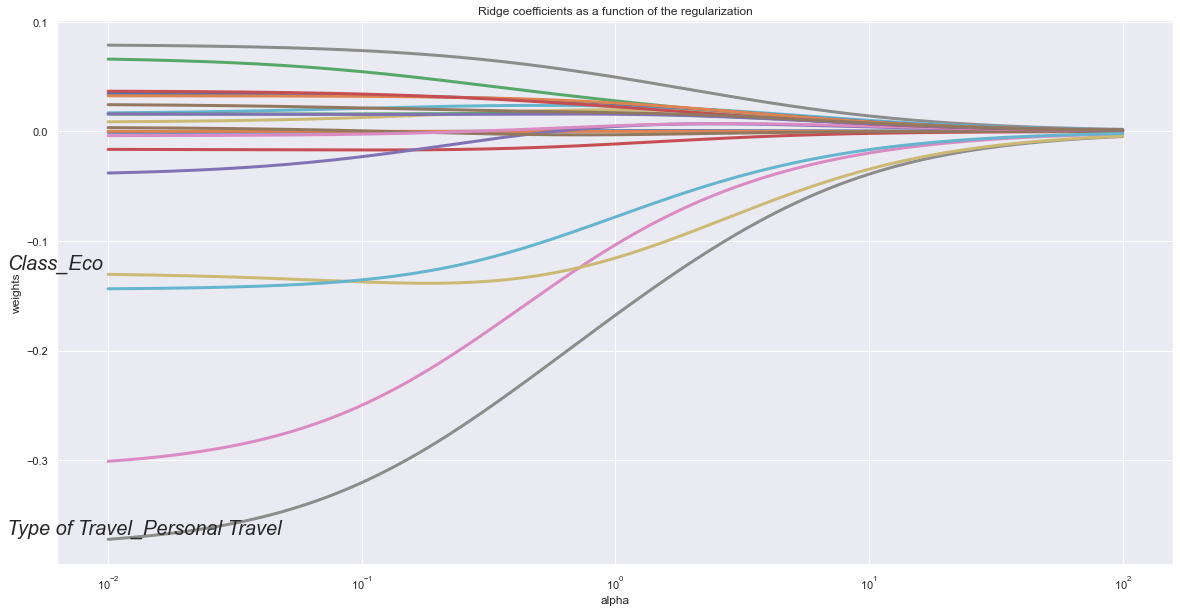

In [76]:
from sklearn.metrics import mean_squared_error
coefs = []
alphas = np.logspace(-2, 2,200)

# Train the model with different regularisation strengths
for a in alphas:
    ridge_cof = Ridge(alpha=a, normalize=True)
    ridge_cof.fit(X_train, y_train)
    coefs.append(ridge_cof.coef_)

# Display results
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, coefs,  linewidth=3, markersize=12, label=X_train.columns)
ax.set_xscale("log")
ax.set_ylim([-0.3, 0.3])
ax.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")

# Adding text
ax.text(alphas[0]-0.006, coefs[0][17]+0.005, "Type of Travel_Personal Travel", style='italic', fontsize=20)  

plt.show()

#### 4.5-Lasso Regression
- We can use Lasso Regression to select important features of a dataset.
- It tends to shirink the coefficients of less important features to be exactly zero.
Fitting data, then we can extract the coef attribute and store in lasso coef. Plotting the coefficients as a function of feature name yields this figure and you can see directly that the most important predictor for our target variable, housing price, is number of rooms! This is not surprising and is a great sanity check.

In [35]:
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso())]

pipeline = Pipeline(steps)

# Setup the hyperparameter grid
alpha_space = np.logspace(-4, 0, 50)
param_grid = {'lasso__alpha': alpha_space}

# Instantiate the GridSearchCV object: logreg_cv
lasso_cv = GridSearchCV(pipeline, param_grid, cv=5)

# Fit it to the data
lasso_cv.fit(X_train, y_train)

print("Tuned Ridge Regression Parameters: {}".format(lasso_cv.best_params_)) 
print("Best score is {}".format(lasso_cv.best_score_))

Tuned Ridge Regression Parameters: {'lasso__alpha': 0.0001}
Best score is 0.5503865577704444


0.5067099037039049


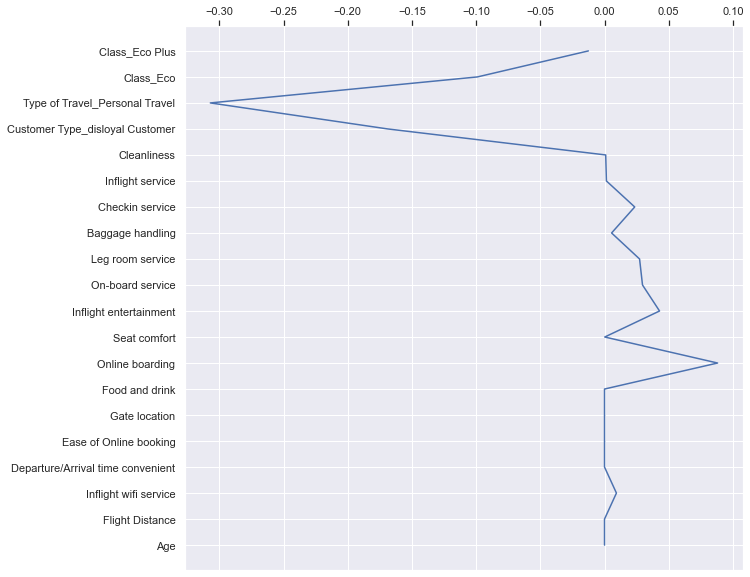

In [135]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.0001, normalize=True)

# Fit the regressor to the data
lasso.fit(X_train, y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso.score(X_test, y_test))

# Plot the coefficients
plt.figure(figsize=(10,10))
plt.plot(lasso_coef, range(len(X_train.columns)))
plt.yticks(range(len(X_train.columns)), X_train.columns, rotation=0)
plt.gca().xaxis.tick_top()
plt.show()


####  ANS-1
The graphs that resulted from Ridge Regression and Lasso Regression were investigated. **"Type of Travel_Personal Travel"** should be the most crucial indicator of the result at the conclusion of the two models.


---------------------------------

####  ANS-2

#### 4-6-Model Comparison

**ROC Curve & Area under the ROC curve(AUC)** \
ROC curve provides a nice visual way to assess our classifier's performance.


We have a binary classifier that in fact is just randomly making guesses. The Area under this ROC curve would be 0.5. This is one way in which the AUC is an informative metric to evaluate a model. **If the AUC is greater than 0.5, the model is better than random guessing.**


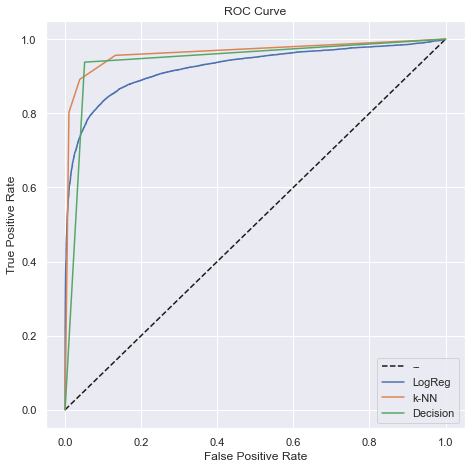

  logreg AUC: 0.9247243519080524
    k-NN AUC: 0.9634960466203288
Decision AUC: 0.9432821009402692


In [78]:
logreg_y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]
knn_y_pred_prob = knn_scaled.predict_proba(X_test)[:,1]
decision_y_pred_prob = decision_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, logreg_y_pred_prob)
fpr2, tpr2, thresholds2 = roc_curve(y_test, knn_y_pred_prob)
fpr3, tpr3, thresholds3 = roc_curve(y_test, decision_y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(7.5, 7.5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(["--","LogReg", "k-NN", "Decision"])
plt.show()

# Compute and print AUC score
print("  logreg AUC: {}".format(roc_auc_score(y_test, logreg_y_pred_prob)))
print("    k-NN AUC: {}".format(roc_auc_score(y_test, knn_y_pred_prob)))
print("Decision AUC: {}".format(roc_auc_score(y_test, decision_y_pred_prob)))

Logistic Regression, k-Nearest Neighbor, and Decision Tree Classifier models were used to estimate passenger satisfaction (1:"satisfied", 0:"neutral or dissatisfied"). The F1 scores and the ROC curve were used to compare the model outcomes. Among the models used to estimate passenger happiness, the **Decision Tree Classifier** produces the best results.